In [2]:
## Import libraries
import nltk
import string
import os
import pandas as pd
import re
from nltk.corpus import stopwords
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from scipy.spatial.distance import cosine
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text as text
from sklearn import decomposition

ImportError: No module named 'nltk'

# TF-IDF

In [1]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(filtered_words, stemmer)
    return stems

for file in sorted(os.listdir()):
    if ('txt' in file) & ('~' not in file) :
        overview = open(file, 'r')
        text = overview.read()
        lowers = text.lower()
        no_punctuation = lowers.translate(string.punctuation)
        token_dict[file] = no_punctuation
        print(file)

token_dict = collections.OrderedDict(sorted(token_dict.items()))

#this can take some time
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfs = tfidf.fit_transform(token_dict.values())

NameError: name 'PorterStemmer' is not defined

In [97]:
data = tfs.todense()
i = 0
j = 1
change = []
while j <= len(token_dict.keys()) - 1:
    change.append(cosine(data[i,:], data[j,:]))
    print(cosine(data[i,:], data[j,:]))
    j += 1
    i += 1    

0.784795452808
0.802912839686
0.398232791113
0.130355871024
0.0742526660162
0.0362123565299
0.118287650877
0.14857331694


0 0.784795452808
1 0.802912839686
2 0.398232791113
3 0.130355871024
4 0.0742526660162
5 0.0362123565299
6 0.118287650877
7 0.14857331694


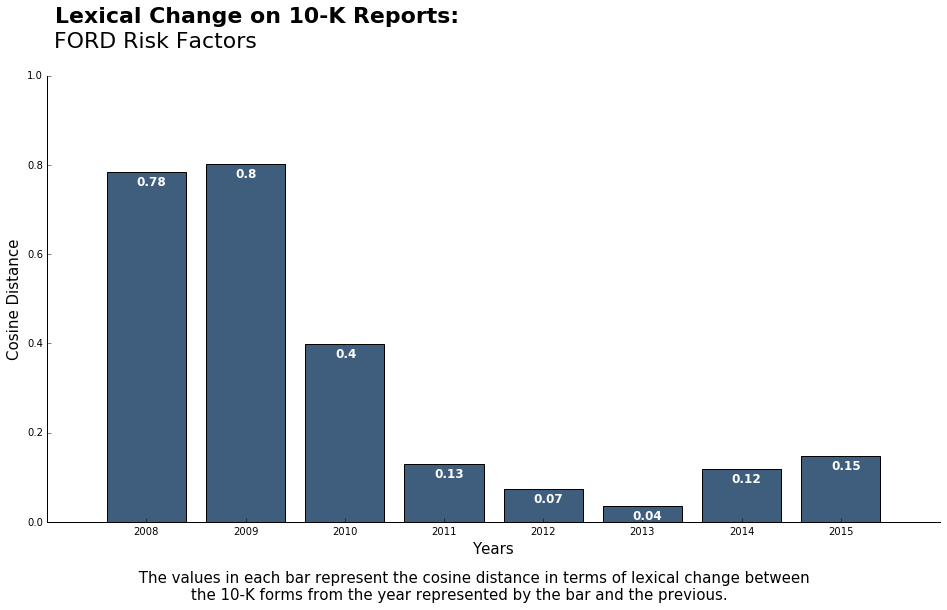

In [190]:
%matplotlib inline
years = ['2008','2009','2010','2011','2012','2013','2014','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(16, 8))  

ax = plt.subplot(111)
plt.bar(x_pos, change, align = 'center', color="#3F5D7D")
plt.xticks(x_pos, years)
plt.ylabel("Cosine Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.307, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("\n FORD Risk Factors\n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
for i, v in enumerate(change):
    ax.text(i - 0.1, v - 0.03, str(round(v,2)), color='white', fontweight='bold', size = 12)
    print(i,v)
fig.text(0.2,-0.01,''' The values in each bar represent the cosine distance in terms of lexical change between
            the 10-K forms from the year represented by the bar and the previous.''', fontsize = 15)


In [192]:
feature_names = tfidf.get_feature_names()
#np.sort(data[0,:], )
top0_ind = np.array(np.ravel((-data[0,:]).argsort())[:10], dtype = int)
top1_ind = np.array(np.ravel((-data[1,:]).argsort())[:10], dtype = int)
top2_ind = np.array(np.ravel((-data[2,:]).argsort())[:10], dtype = int)
top3_ind = np.array(np.ravel((-data[3,:]).argsort())[:10], dtype = int)
print("top words 2007")
print([feature_names[i] for i in list(top0_ind)], "\n")
print("top words 2008")
print([feature_names[i] for i in list(top1_ind)], "\n")
print("top words 2009")
print([feature_names[i] for i in list(top2_ind)], "\n")
print("top words 2010")
print([feature_names[i] for i in list(top3_ind)], "\n")

top5_ind = np.array(np.ravel((-data[5,:]).argsort())[:10], dtype = int)
top6_ind = np.array(np.ravel((-data[6,:]).argsort())[:10], dtype = int)
print([feature_names[i] for i in list(top5_ind)], "\n")
print([feature_names[i] for i in list(top6_ind)], "\n")

top words 2007
['market', 'sport', 'share', 'result', 'vehicl', 'past', 'year', 'overcapac', 'declin', 'industri'] 

top words 2008
['credit', 'disrupt', 'program', 'financ', 'fund', 'securit', 'abil', 'ford', 'major', 'govern'] 

top words 2009
['market', 'servic', 'fuel', 'vehicl', 'result', 'factor', 'financi', 'grow', 'price', 'share'] 

top words 2010
['unit', 'market', 'million', 'declin', 'year', 'share', 'sale', 'industri', 'volum', 'state'] 

['market', 'unit', 'vehicl', 'million', 'declin', 'share', 'sale', 'industri', 'result', 'profit'] 

['market', 'vehicl', 'unit', 'industri', 'sale', 'fuel', 'financi', 'result', 'profit', 'declin'] 












# NON NEGATIVE MATRIX FACTORIZATION

In [201]:
#vectorizer = text.CountVectorizer(tokenizer=tokenize, stop_words='english')
#dtm = vectorizer.fit_transform(token_dict.values()).toarray()

num_topics = 4
num_top_words = 20
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [202]:
doctopic = clf.fit_transform(tfs)
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [203]:
H = clf.components_
# topic_words = []

# for topic_index in range( H.shape[0] ):
#     top_indices = np.argsort( H[topic_index,:] )[::-1][0:10]
#     term_ranking = [terms[i] for i in top_indices]
#     print(topic_index, term_ranking )
for topic_index in range(H.shape[0]):
    top_indices = np.array(np.ravel((-H[topic_index,:]).argsort())[:10], dtype = int)
    top_terms = [feature_names[i] for i in top_indices]
    print("Topic %s: %s" %(topic_index, ",  ".join(top_terms)))


Topic 0: market,  unit,  million,  share,  declin,  sale,  industri,  vehicl,  volum,  year
Topic 1: credit,  disrupt,  program,  financ,  fund,  securit,  abil,  ford,  major,  govern
Topic 2: market,  fuel,  servic,  vehicl,  grow,  price,  result,  financi,  substanti,  factor
Topic 3: market,  share,  sport,  result,  vehicl,  past,  overcapac,  industri,  year,  advers


In [204]:
i = 0
j = 1
change_topic = []
while j <= len(token_dict.keys()) - 1:
    change_topic.append(cosine(doctopic[i,:], doctopic[j,:]))
    print(cosine(doctopic[i,:], doctopic[j,:]))
    j += 1
    i += 1    

1.0
1.0
1.0
0.0542912174252
0.0123148034288
0.0650991205193
0.29141323929
0.107778595964


In [2]:
all_topics = {}
topics = [2,6,10]
for i in topics:
    num_topics = i
    clf = decomposition.NMF(n_components=num_topics, random_state=1)
    doctopic = clf.fit_transform(tfs)
    doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)
    i = 0
    j = 1
    change_topic = []
    while j <= len(token_dict.keys()) - 1:
        change_topic.append(cosine(doctopic[i,:], doctopic[j,:]))
        print(cosine(doctopic[i,:], doctopic[j,:]))
        j += 1
        i += 1    
    all_topics[str(i)] = change_topic

NameError: name 'decomposition' is not defined

0 1.0
1 1.0
2 1.0
3 0.0542912174252
4 0.0123148034288
5 0.0650991205193
6 0.29141323929
7 0.107778595964


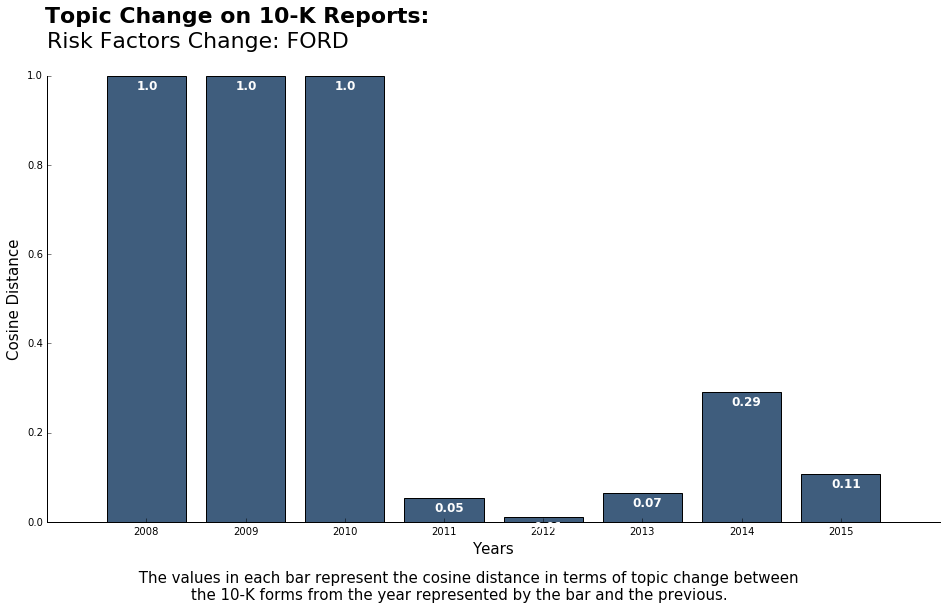

In [205]:
%matplotlib inline
years = ['2008','2009','2010','2011','2012','2013','2014','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(16, 8))  

ax = plt.subplot(111)
plt.bar(x_pos, change_topic, align = 'center', color="#3F5D7D")
plt.xticks(x_pos, years)
plt.ylabel("Cosine Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Topic Change on 10-K Reports:", x = 0.29, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Risk Factors Change: FORD \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

for i, v in enumerate(change_topic):
    ax.text(i - 0.1, v - 0.03, str(round(v,2)), color='white', fontweight='bold', size = 12)
    print(i,v)
fig.text(0.2,-0.01,''' The values in each bar represent the cosine distance in terms of topic change between
            the 10-K forms from the year represented by the bar and the previous.''', fontsize = 15)

